> # Loan Approval Prediction

## 1. Import Packages & Data

In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

#Read CSV data
data = pd.read_csv(r"C:\Users\tando\Downloads\LoanApprovalPrediction.csv")

In [4]:
data=pd.DataFrame(data)

In [5]:
#preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Data Quality & Missing Value Assesment

In [6]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [7]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

### Percentage - Missing Values

In [10]:
(data.isnull().sum()/data.shape[0])*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Number of people who take a loan group by gender :
Male      487
Female    111
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

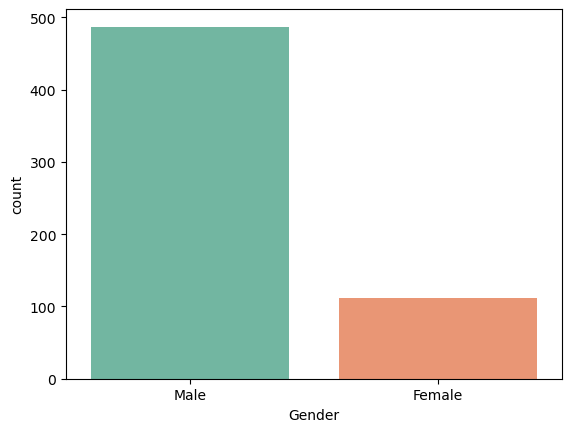

In [11]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

Number of people who take a loan group by marital status :
Yes    388
No     210
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

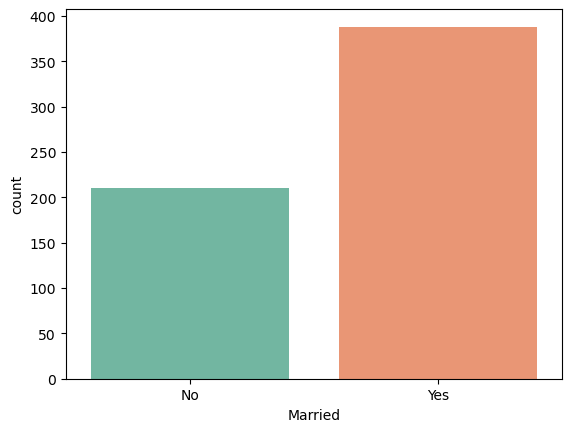

In [12]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set2')

Number of people who take a loan group by dependents :
0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

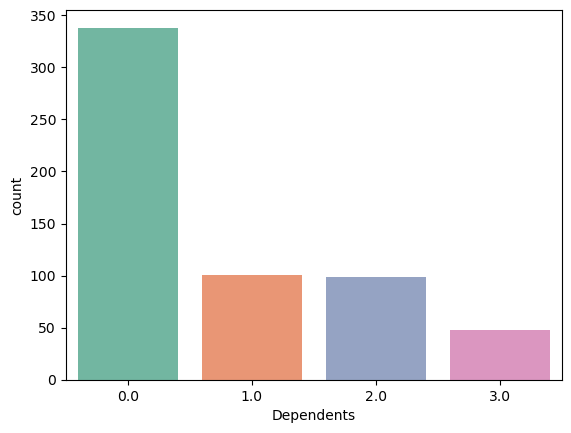

In [14]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set2')

Number of people who take a loan group by self employed :
No     488
Yes    110
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

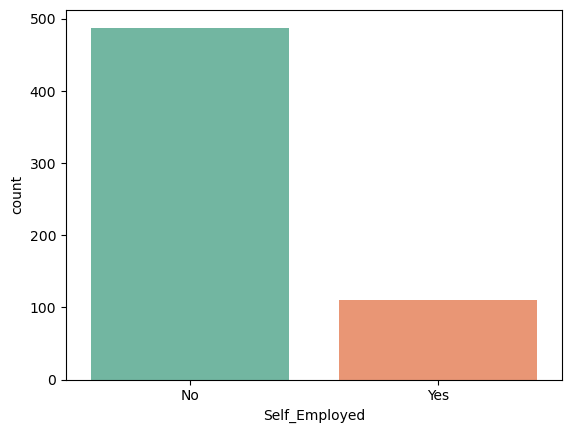

In [15]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

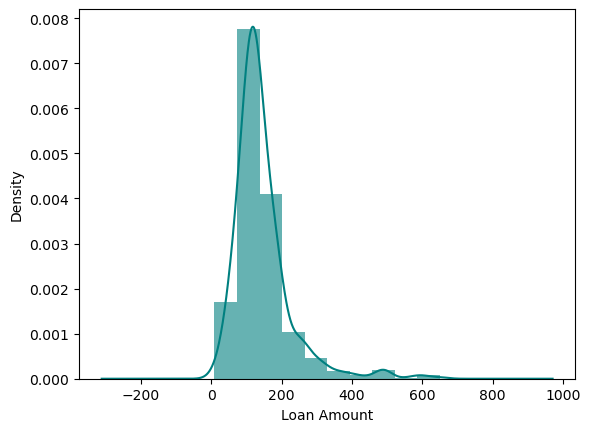

In [16]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

Number of people who take a loan group by loan amount term :
360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

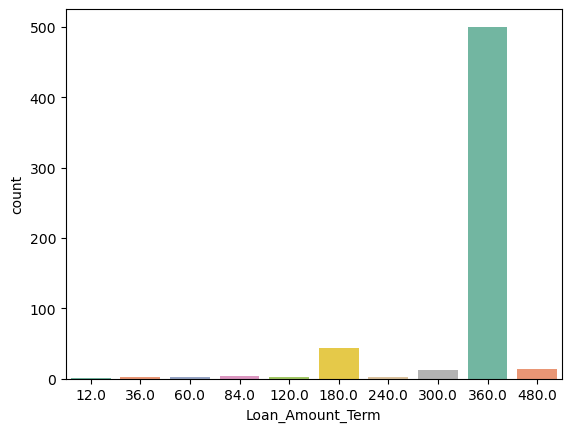

In [17]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

Number of people who take a loan group by credit history :
1.0    463
0.0     86
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

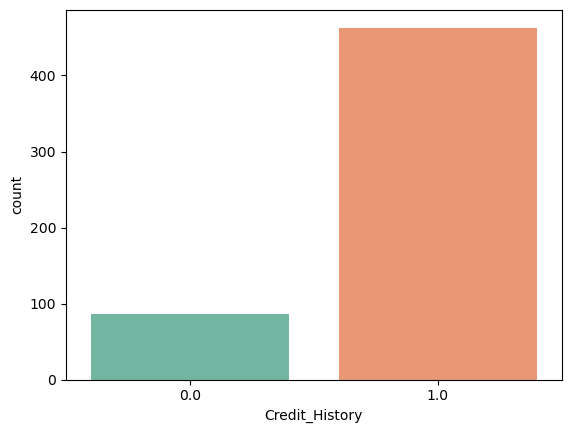

In [18]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')

## 3. Final Adjustments to Data

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

* If "Gender" is missing for a given row, I'll impute with Male (most common answer).
* If "Married" is missing for a given row, I'll impute with yes (most common answer).
* If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
* If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
* If "LoanAmount" is missing for a given row, I'll impute with mean of data.
* If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
* If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [19]:
dfc = data.copy()
dfc['Dependents'].fillna(dfc['Dependents'].value_counts().idxmax(), inplace=True)
dfc["LoanAmount"].fillna(dfc["LoanAmount"].mean(skipna=True), inplace=True)
dfc['Loan_Amount_Term'].fillna(dfc['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
dfc['Credit_History'].fillna(dfc['Credit_History'].value_counts().idxmax(), inplace=True)

In [21]:
#Check missing values
dfc.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

dfc['Gender'] = dfc['Gender'].replace(gender_stat)
dfc['Married'] = dfc['Married'].replace(yes_no_stat)
dfc['Dependents'] = dfc['Dependents'].replace(dependents_stat)
dfc['Education'] = dfc['Education'].replace(education_stat)
dfc['Self_Employed'] = dfc['Self_Employed'].replace(yes_no_stat)
dfc['Property_Area'] = dfc['Property_Area'].replace(property_stat)

In [123]:
dfc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,1,Y
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,2,Y
594,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,2,Y
595,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,1,Y
596,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,1,Y


In [25]:
dfc.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    int64  
 2   Married            598 non-null    int64  
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    int64  
 5   Self_Employed      598 non-null    int64  
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    int64  
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(6), object(2)
memory usage: 60.9+ KB


In [44]:
dfc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,144.968804,360.0,1.0,1,Y
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


## 4. Making Prediction

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
#Separate feature and target
# dfc=dfc.drop(['Loan_ID'],axis=1)
X = dfc.drop(['Loan_Status'],axis=1)
y = dfc.Loan_Status

#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
clf=GradientBoostingClassifier()

In [113]:
clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [114]:
y_pred=clf.predict(X_test)

In [115]:
accuracy_score(y_pred,y_test)


0.7575757575757576

In [116]:
# Hyperparameter tuning

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [118]:
# Get the best hyperparameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)
score.append(test_score)

Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500}
Best Score: 0.805
Test Set Score: 0.7828282828282829


In [69]:
# XGBoost

In [70]:
from xgboost import XGBClassifier

In [72]:
clf = XGBClassifier()

In [75]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [76]:
accuracy_score(y_pred,y_test)


0.7828282828282829

In [77]:
# Hyperparameter Tuning

In [78]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5,verbose=3)
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6;, score=0.738 total time=   0.3s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6;, score=0.775 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6;, score=0.800 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6;, score=0.787 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6;, score=0.825 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.738 total time=   0.0s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.775 total time=   0.0s
[CV 3/5] END

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [83]:
grid_search

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [81]:
# Get the best hyperparameters and model performance
best_params= grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_



In [82]:
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)
score.append(test_score)

Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best Score: 0.82
Test Set Score: 0.7828282828282829


In [84]:
# Random Forest

In [86]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

accuracy_score(y_pred,y_test)

0.7828282828282829

In [87]:
# Hyperparameter Tuning

In [88]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [91]:
# Get the best hyperparameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_


In [92]:
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)
score.append(test_score)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}
Best Score: 0.8174999999999999
Test Set Score: 0.7828282828282829


In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
clf  =  DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_pred,y_test)


0.696969696969697

In [106]:
# Decion Tree

In [107]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5,verbose=3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.637 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.637 total time=   0.0s
[CV 1/5] END criterion=gini, max_dep

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.700 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.650 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.662 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.688 total time=   0.0s
[CV 5/5] END criterion=gini, max_dept

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, m

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, 

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2;, score=0.675 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.662 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.675 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.662 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.700 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.650 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.637 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.662 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_featu

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, max_feat

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.675 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.662 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 3/5] END criteri

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.625 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.637 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 2/5] END cr

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.713 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5;, score=0.775 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5;, score=0.600 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.650 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, ma

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.675 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5;, score=0.725 total time=   0.0s
[CV 3/5] END criterion=entropy, ma

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.650 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.613 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.650 total time=   0.0s
[CV 2/5] END criterion=entrop

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.637 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.625 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10;, score=0.675 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy

C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\tando\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.700 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;, score=0.637 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;, score=0.650 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;, score=0.662 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5;, score=0.688 total time=   0.0s
[CV 1/5] END criterion=entropy, ma

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [108]:

# Get the best hyperparameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_



In [109]:
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)
score.append(test_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7975
Test Set Score: 0.7525252525252525


## 5. Result

In [119]:
# Gradiant Boost giving the best accuracy

In [120]:
# Saving model

In [122]:
import pickle


# Save the model to a .pkl file
with open('best_GB.pkl', 'wb') as file:
    pickle.dump(clf, file)
